In [60]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('Ims/land0.jpg',0)# queryImage
img2 = cv.imread('Ims/src0.jpg',0) # trainImage

In [61]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# encontrar los puntos clave y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [62]:
des1 = np.asarray(des1, np.float32)
des2 = np.asarray(des2, np.float32)

In [63]:
des2

array([[  2.,   5.,  11., ...,  14.,   7.,   2.],
       [ 13.,  32.,  57., ...,   0.,   0.,   0.],
       [ 10.,   3.,   1., ...,   0.,   0.,   0.],
       ...,
       [  7.,   0.,   1., ...,   7.,   1.,   6.],
       [ 74., 117.,   0., ...,  24.,  20.,   9.],
       [  0.,   3.,  48., ...,   0.,   0.,   2.]], dtype=float32)

In [64]:

# FLANN parameters
#FLANN_INDEX_KDTREE = 1
#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

In [65]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [66]:
index_params

{'algorithm': 1, 'trees': 5}

In [67]:
FLANN_INDEX_LSH = 4
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

In [68]:
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

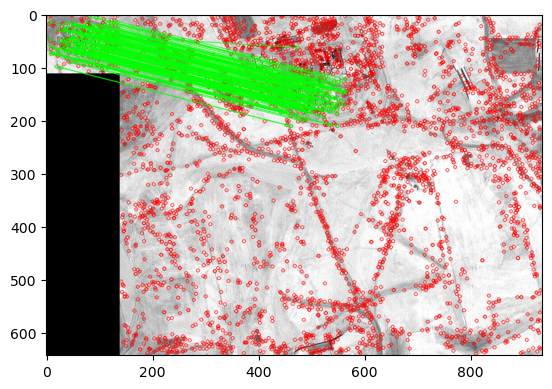

(<matplotlib.image.AxesImage at 0x1e8fc2cc140>, None)

In [69]:

matchesMask = [[0,0] for i in range(len(matches))]


for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()
